In [4]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

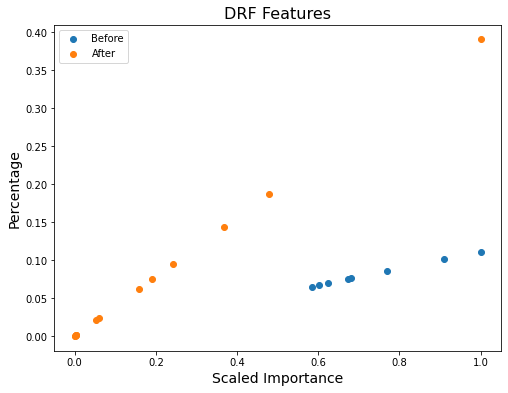

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
x1 = [1.000000,0.909364,0.768569,0.681754,0.673108,0.623321,0.601727,0.585444]
y1 = [0.111268,0.101183,0.085517,0.075857,0.074895,0.069356,0.066953,0.065141]

x2 = [1.000000,0.478895,0.368392,0.241698,0.191599,0.158010,0.059263,0.052366,0.002766,0.002476,0.002288,0.001461,0.000043]
y2 = [0.390739,0.187123,0.143945,0.094441,0.074865,0.061740,0.023156,0.020461,0.001081,0.000967,0.000894,0.000571,0.000017]

plt.figure(figsize=(8,6))
# plt.scatter(accuracy, weighted_f1_avg, s=200, color="red")
plt.xlabel("Scaled Importance",fontsize=14)
plt.ylabel("Percentage",fontsize=14)
plt.title("DRF Features",fontsize=16)



l1 = plt.scatter(x1,y1)
l2 = plt.scatter(x2,y2)
# for i, label in enumerate(models):
#     plt.annotate(label, (accuracy[i], weighted_f1_avg[i]),fontsize=14)
plt.legend(handles=[l1, l2], labels=['Before', 'After'])
plt.show()

/var/folders/11/1w8hy18j0r12wk4g7x6gd06h0000gn/T/ipykernel_9841/3623952617.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv('../dataset/pcap.csv')


<AxesSubplot:>

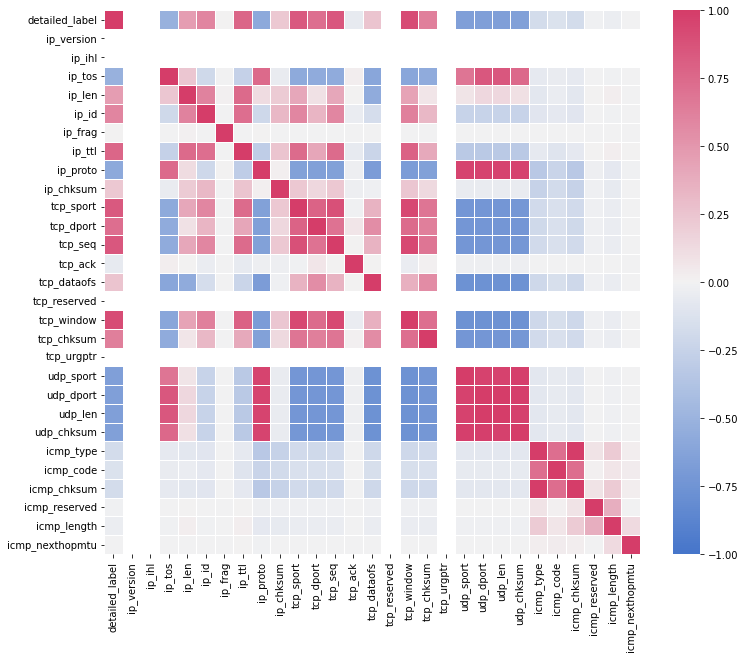

In [2]:
df_raw = pd.read_csv('../dataset/pcap.csv')
df_raw = df_raw[df_raw['ip_version']==4.0]
del df_raw['ts']
del df_raw['pcap_row_id']
del df_raw['ip_src']
del df_raw['ip_dst']

df_raw = df_raw.fillna(0)
df_raw = df_raw[(df_raw['detailed_label']=="Attack")|(df_raw['detailed_label']=="Benign")|(df_raw['detailed_label']=="C&C")|(df_raw['detailed_label']=="DDoS")]
df_raw['detailed_label'] = df_raw['detailed_label'].replace(to_replace= 'Attack',value= 2)
df_raw['detailed_label'] = df_raw['detailed_label'].replace(to_replace= 'Benign',value= -1)
df_raw['detailed_label'] = df_raw['detailed_label'].replace(to_replace= 'C&C',value= 3)
df_raw['detailed_label'] = df_raw['detailed_label'].replace(to_replace= 'DDoS',value= 4)

Var_Corr = df_raw.corr(method='spearman')
# Var_Corr = df_raw.corr(method='kendall')
fig, ax = plt.subplots(figsize=(12,10))
cmap = sns.diverging_palette(255, 0, as_cmap=True, center="light")
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, linewidths=1, ax=ax, cmap=cmap,vmax=1,vmin=-1)


<AxesSubplot:>

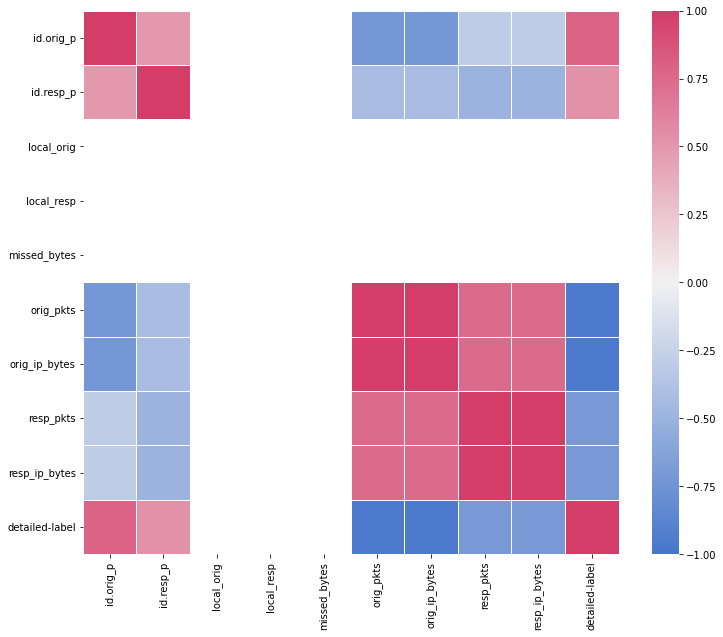

In [3]:
df_raw = pd.read_csv('../dataset/zeek.csv')
del df_raw['ts']

df_raw = df_raw[(df_raw['detailed-label']=="Attack")|(df_raw['detailed-label']=="Benign")|(df_raw['detailed-label']=="C&C")|(df_raw['detailed-label']=="DDoS")]
df_raw['detailed-label'] = df_raw['detailed-label'].replace(to_replace= 'Attack',value= 2)
df_raw['detailed-label'] = df_raw['detailed-label'].replace(to_replace= '-',value= -1)
df_raw['detailed-label'] = df_raw['detailed-label'].replace(to_replace= 'C&C',value= 3)
df_raw['detailed-label'] = df_raw['detailed-label'].replace(to_replace= 'DDoS',value= 4)
df_raw = df_raw.replace(to_replace= '-',value= np.nan)
# del df_raw['pcap_row_id']
# del df_raw['ip_src']
# del df_raw['ip_dst']

Var_Corr = df_raw.corr(method='spearman')
# Var_Corr = df_raw.corr(method='kendall')
fig, ax = plt.subplots(figsize=(12,10))
cmap = sns.diverging_palette(255, 0, as_cmap=True, center="light")
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, linewidths=1, ax=ax, cmap=cmap,vmax=1,vmin=-1)

/var/folders/11/1w8hy18j0r12wk4g7x6gd06h0000gn/T/ipykernel_9841/206992860.py:1: DtypeWarning: Columns (21,22,23,24,25,26,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv('../dataset/all.csv')
/var/folders/11/1w8hy18j0r12wk4g7x6gd06h0000gn/T/ipykernel_9841/206992860.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['detailed_label'] = df_raw['detailed_label'].replace(to_replace= 'Attack',value= 2)
/var/folders/11/1w8hy18j0r12wk4g7x6gd06h0000gn/T/ipykernel_9841/206992860.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

<AxesSubplot:>

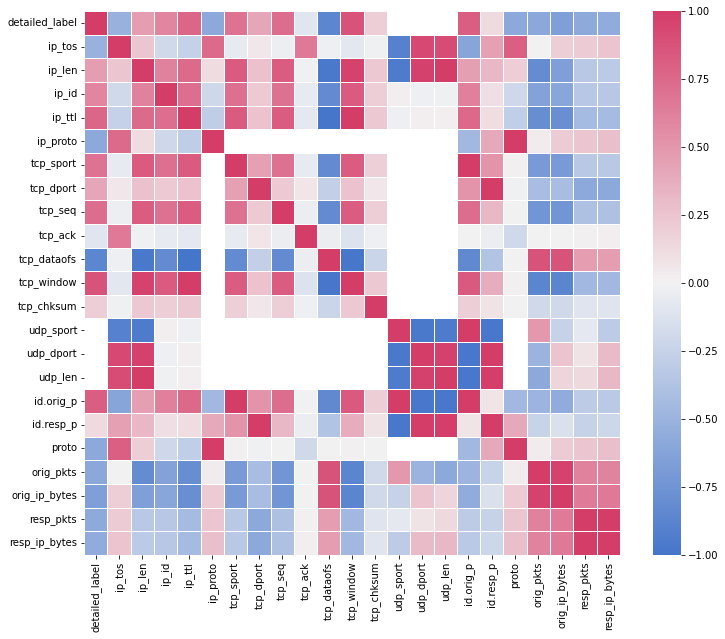

In [4]:
df_raw = pd.read_csv('../dataset/all.csv')
del df_raw['Unnamed: 0']
del df_raw['local_resp']
del df_raw['missed_bytes']
# df_raw['detailed_label'] = df_raw['detailed_label'].replace(to_replace= '-',value= 'Benign')
df_raw['proto'] = df_raw['proto'].map({"tcp":6,"udp":17,"icmp":1})
df_raw = df_raw[(df_raw['detailed_label']=="Attack")|(df_raw['detailed_label']=="Benign")|(df_raw['detailed_label']=="C&C")|(df_raw['detailed_label']=="DDoS")]
df_raw['detailed_label'] = df_raw['detailed_label'].replace(to_replace= 'Attack',value= 2)
df_raw['detailed_label'] = df_raw['detailed_label'].replace(to_replace= 'Benign',value= -1)
df_raw['detailed_label'] = df_raw['detailed_label'].replace(to_replace= 'C&C',value= 3)
df_raw['detailed_label'] = df_raw['detailed_label'].replace(to_replace= 'DDoS',value= 4)
df_raw = df_raw.replace(to_replace= '-',value= np.nan)
# df_raw['detailed_label'].value_counts()
Var_Corr = df_raw.corr(method='spearman')
# Var_Corr = df_raw.corr(method='kendall')
fig, ax = plt.subplots(figsize=(12,10))

cmap = sns.diverging_palette(255, 0, as_cmap=True, center="light")

sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, linewidths=1, ax=ax, cmap=cmap,vmax=1,vmin=-1)